<a href="https://colab.research.google.com/github/mohanaditya910/Analytics_Vidhya_problems/blob/master/MNC-trainee-enhancement-binary-Classification/AV_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--> Data exploration and feature engineering..

--> Model selection..

--> Fine tuning..

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
def preprocess_train_reg(df):

  df.program_duration = ((df.program_duration - df.program_duration.mean()) / df.program_duration.std())
  
  df.trainee_engagement_rating = df.trainee_engagement_rating.fillna(1.0) 

  df.age = ((df.age - df.age.mean()) / df.age.std())

  df.drop(['trainee_id'],axis=1,inplace=True)
  
  gender_mapping = {'M':1,'F':0}
  test_type_mapping = {'offline':0,'online':1}
  is_handicapped_mapping = {'N':1,'Y':0}
  
  df.is_handicapped = df.is_handicapped.map(is_handicapped_mapping)
  df.test_type = df.test_type.map(test_type_mapping)
  df.gender = df.gender.map(gender_mapping)
  
  education_mapping = {'No Qualification':0,'Matriculation':1,'High School Diploma':2,'Bachelors':3,'Masters':4}
  df.education = df.education.map(education_mapping)
  
  difficulty_level_mapping = {'easy':0,'intermediate':1,'hard':2,'vary hard':3}
  df.difficulty_level = df.difficulty_level.map(difficulty_level_mapping)
  
  df.drop(['program_id'],axis=1,inplace=True)
  
  program_type_mapping = {'S':0,'T':1,'U':2,'V':3,'X':4,'Y':5,'Z':6}
  df.program_type = df.program_type.map(program_type_mapping)
  
  X = df.drop(['id','is_pass'],axis=1)
  y = df.is_pass

  return X,y

In [0]:
def preprocess_test_reg(df):

  df.program_duration = ((df.program_duration - df.program_duration.mean()) / df.program_duration.std())
  
  df.trainee_engagement_rating = df.trainee_engagement_rating.fillna(1.0) 

  df.age = ((df.age - df.age.mean()) / df.age.std())

  df.drop(['trainee_id'],axis=1,inplace=True)
  
  gender_mapping = {'M':1,'F':0}
  test_type_mapping = {'offline':0,'online':1}
  is_handicapped_mapping = {'N':1,'Y':0}
  
  df.is_handicapped = df.is_handicapped.map(is_handicapped_mapping)
  df.test_type = df.test_type.map(test_type_mapping)
  df.gender = df.gender.map(gender_mapping)
  
  education_mapping = {'No Qualification':0,'Matriculation':1,'High School Diploma':2,'Bachelors':3,'Masters':4}
  df.education = df.education.map(education_mapping)
  
  difficulty_level_mapping = {'easy':0,'intermediate':1,'hard':2,'vary hard':3}
  df.difficulty_level = df.difficulty_level.map(difficulty_level_mapping)
  
  df.drop(['program_id'],axis=1,inplace=True)
  
  program_type_mapping = {'S':0,'T':1,'U':2,'V':3,'X':4,'Y':5,'Z':6}
  df.program_type = df.program_type.map(program_type_mapping)
  
  X = df.drop(['id'],axis=1)
  

  return X

In [0]:
def one_hot_encoder_reg(X):
  from sklearn.preprocessing import OneHotEncoder

  #program_type feature to one-hot-encoding
  p_t_ohe = OneHotEncoder()
  p_t_arr = p_t_ohe.fit_transform(X.program_type.to_numpy().reshape(len(X.index),1)).toarray()
  p_t_lab = ['S','T','U','V','X','Y','Z']
  program_type_features = pd.DataFrame(p_t_arr,columns=p_t_lab,index=X.index)
  
  #difficulty_level feature one-hor-encoding
  d_l_ohe = OneHotEncoder()
  d_l_arr = d_l_ohe.fit_transform(X.difficulty_level.to_numpy().reshape(len(X.index),1)).toarray()
  d_l_lab =['easy','intermediate','hard','vary hard']
  difficulty_level_features = pd.DataFrame(d_l_arr,columns=d_l_lab,index=X.index)
  
  #education feature one-hot-encoding
  e_lab = ['No Qualification','Matriculation','High School Diploma','Bachelors','Masters']
  e_ohe = OneHotEncoder()
  e_arr = e_ohe.fit_transform(X.education.to_numpy().reshape(len(X.index),1)).toarray()
  education_features = pd.DataFrame(e_arr,columns=e_lab,index=X.index)

  ###########gender
  gender_lab = ['Male','Female']
  gender_ohe = OneHotEncoder()
  gender_arr = gender_ohe.fit_transform(X.gender.to_numpy().reshape(len(X.index),1)).toarray()
  gender_features = pd.DataFrame(gender_arr,columns=gender_lab,index=X.index)
  ###########
  is_handicapped_lab = ['handicapped','not_handicapped']
  is_handicapped_ohe = OneHotEncoder()
  is_handicapped_arr = gender_ohe.fit_transform(X.is_handicapped.to_numpy().reshape(len(X.index),1)).toarray()
  is_handicapped_features = pd.DataFrame(is_handicapped_arr,columns=is_handicapped_lab,index=X.index)  


  ###########
  test_type_lab = ['offline','online']
  test_type_ohe = OneHotEncoder()
  test_type_arr = gender_ohe.fit_transform(X.test_type.to_numpy().reshape(len(X.index),1)).toarray()
  test_type_features = pd.DataFrame(test_type_arr,columns=test_type_lab,index=X.index)


  X_ohe = pd.concat([X,program_type_features,difficulty_level_features,education_features,test_type_features,is_handicapped_features,gender_features],axis=1)#,age_features
  X_ohe = X_ohe.drop(labels= ['program_type','test_id','difficulty_level','education','test_type','gender','is_handicapped'],axis=1)#,'age','Age_Group'

  return X_ohe

In [32]:
df = pd.read_csv("/content/drive/My Drive/AV1/train.csv")
df.set_index(keys='id',drop=False,inplace=True)
df.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
id,,,,,,,,,,,,,,,,
9389_150,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
16523_44,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
13987_178,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
13158_32,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
10591_84,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [0]:
X_reg,y_reg = preprocess_train_reg(df)
X_reg = one_hot_encoder_reg(X_reg)

X_test = X_reg[X_reg.age.isna()]
X_sumne = X_reg[X_reg.age.notna()]
y_train = X_sumne.age
X_train = X_sumne.drop(axis=1,labels=['age'])

In [34]:
from xgboost import XGBRegressor

xgb_r = XGBRegressor(max_depth=10)
xgb_r.fit(X_train,y_train)

y_pred = xgb_r.predict(X_train)
from sklearn.metrics import mean_squared_error
print('mean_square_error:{}'.format(mean_squared_error(y_train,y_pred)))

[14:11:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
mean_square_error:0.5972807880220204


In [35]:
from sklearn.neighbors import KNeighborsRegressor

knn= KNeighborsRegressor(n_neighbors=15,weights='distance')

knn.fit(X_train,y_train)

y_knn = knn.predict(X_train)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train,y_knn)

print('mean square error: %.2f' % (mse*100))

mean square error: 50.96


In [0]:
keys = X_reg.loc[X_reg['age'].isna()].index 
#values = knn.predict(X_reg[X_reg['age'].isna()].drop(axis=1,labels=['age']))
values = xgb_r.predict(X_reg[X_reg['age'].isna()].drop(axis=1,labels=['age']))
dict_ = dict(zip(keys, values))
X_reg.loc[X_reg['age'].isna(),'age'] = X_reg[X_reg['age'].isna()].index.map(dict_)

In [0]:
from sklearn.preprocessing import PolynomialFeatures

poly_feat = PolynomialFeatures()

X_poly = poly_feat.fit_transform(X_reg)

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=70)
X_pca = pca.fit_transform(X_poly)

In [0]:
(pca.explained_variance_ratio_)*100

count = 0
for i,value in enumerate(pca.explained_variance_ratio_):

  count = count+value
  if count>0.99:
    print (i)
    break

In [61]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='auc',objective='rank:pairwise', max_depth=10)
xgb.fit(X_pca,y_reg)

y_predXGB = xgb.predict(X_pca)

from sklearn.metrics import roc_auc_score
roc_score = roc_auc_score(y_reg,y_predXGB)

roc_score

0.7990061322308514

In [0]:
sub_df = pd.read_csv("/content/drive/My Drive/AV1/test.csv")

sub_pre = preprocess_test_reg(sub_df)
sub_ohe = one_hot_encoder_reg(sub_pre)

keys = sub_ohe.loc[sub_ohe['age'].isna()].index 
values = xgb_r.predict(sub_ohe[sub_ohe['age'].isna()].drop(axis=1,labels=['age']))
dict_ = dict(zip(keys, values))
sub_ohe.loc[sub_ohe['age'].isna(),'age'] = sub_ohe[sub_ohe['age'].isna()].index.map(dict_)

sub_poly = poly_feat.transform(sub_ohe)
sub_poly = pca.transform(sub_poly)

predictions = xgb.predict(sub_poly)
sub_dict = {'id':sub_df.id,'is_pass':predictions}

submission = pd.DataFrame(sub_dict)

submission.to_csv('/content/drive/My Drive/AV1/sub-1.csv',index = False)

In [0]:
import seaborn as sns
from sklearn import metrics
def plot_confusion_matrix(score, true_labels, predicted_labels, n_labels):
    confusion_matrix = metrics.confusion_matrix(true_labels,predicted_labels)
    plt.figure(figsize=(n_labels-1,n_labels-1))
    sns.heatmap(confusion_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);



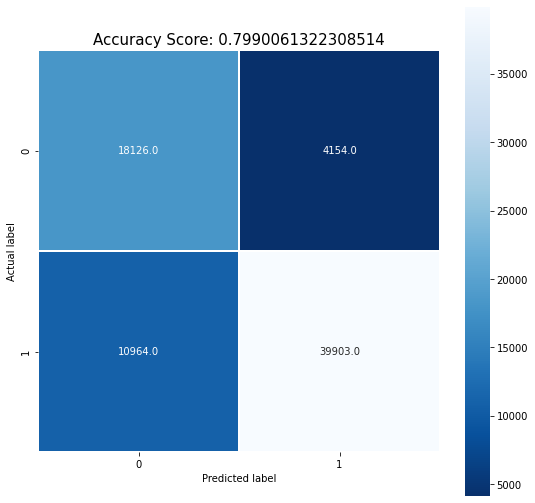

In [68]:
plot_confusion_matrix(roc_score,y_reg,y_predXGB,10)